# Perkenalan
Nama : Fadhilah  
Batch : HCK-013  

**Objective** :  Membangun model mendeteksi spam komentar pada youtube channel dengan deep learning dengan model Natural Language Processing (NLP)

## Import Libraries

In [128]:
pip install Sastrawi

In [129]:
# Import Libraries

import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as tf_hub
from tensorflow.keras.layers import Embedding

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Data Loading

In [130]:
data = pd.read_csv('Youtube01-Psy.csv')
data.head(10)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
5,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",1
6,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
7,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...,0
8,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿,1
9,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


Data Successfully loaded

In [131]:
data.tail(10)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
340,z12exzcrvpeew1yxg04cd5tbwnmfubnh4kk0k,Anthony1SV,2014-11-14T00:01:37,Please do buy these new Christmas shirts! You ...,1
341,z13qyxk5tzq1e5asx22xjt3wdq3ns32f5,Ameenk Chanel,2014-11-14T11:50:02,Free my apps get 1m crdits ! Just click on the...,1
342,z12uyzhazxqkzbrzz04cedqpkwzdvjyy3u40k,Brandon Wilson,2014-11-14T12:21:52,Why does a song like this have more views than...,0
343,z13sh3cz1kbqgrai504cf53qsq25ypmi5zs0k,Leonel Hernandez,2014-11-14T12:35:38,"Something to dance to, even if your sad JUST ...",0
344,z12etrpq5xu0vnm2g230szo5ote3zviny,InterGaming,2014-11-14T13:16:24,everyones back lool this is almost 3 years old...,0
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1
349,z13vhvu54u3ewpp5h04ccb4zuoardrmjlyk0k,Ray Benich,2015-06-05T18:05:16,The first billion viewed this because they tho...,0


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


Diketahui :  
- memiliki 350 row data
- memiliki 5 kolom
- memiliki 4 tipe data string dan 1 tipe data integer

In [133]:
data.duplicated().sum()

0

Tidak memiliki data duplikat

In [134]:
data.isnull().sum()

COMMENT_ID    0
AUTHOR        0
DATE          0
CONTENT       0
CLASS         0
dtype: int64

Tidak memiliki missing value

## Explanatory Data Analysis (EDA)

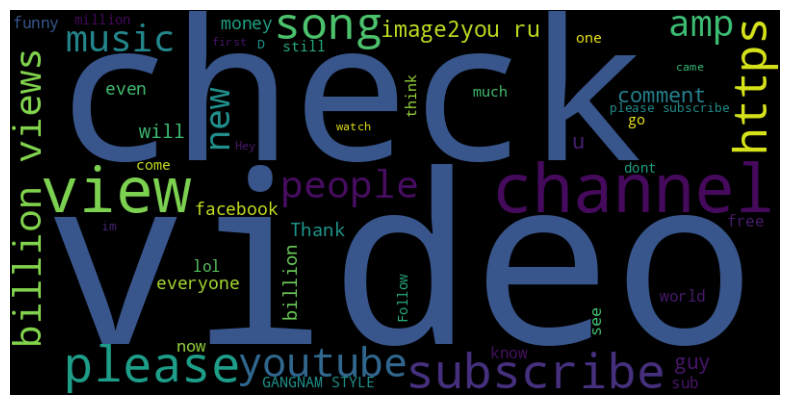

In [135]:
# Combines all tweet text into one string
all_headline_text = ' '.join(data['CONTENT'])

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black', min_font_size=10, max_words=50).generate(all_headline_text)

# Displays WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Diketahui kata yang sering muncul yaitu `video`, `channel`, dan `check`

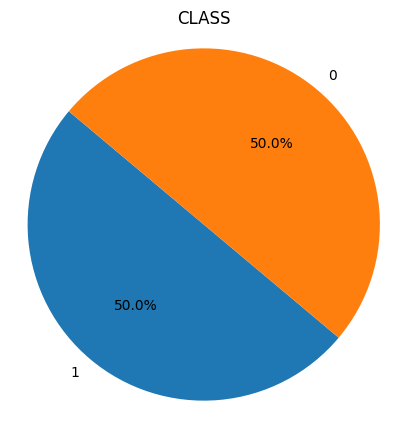

In [136]:
# Hitung distribusi nilai unik dalam kolom 'kategori'
distribution = data['CLASS'].value_counts()

# Buat pie chart
plt.figure(figsize=(5, 5))  # Ukuran gambar
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140)  # Autopct untuk menambahkan persentase, startangle untuk mengatur sudut awal
plt.axis('equal')  # Agar lingkaran terlihat lingkaran sempurna
plt.title('CLASS')  # Judul
plt.show()  # Tampilkan pie chart

Diketahui dari dataset memiliki jumlah data spam dan tidak spam yang sama rata yaitu sebesar 175

## Feature Engineering

### Drop Unnecesarry Columns

In [137]:
# Drop Unneccesarry Columns
n_columns = data.drop(columns= ['COMMENT_ID', 'AUTHOR', 'DATE'])

# Create New Dataframe
data = pd.DataFrame(n_columns)

# Show Dataframe
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...
345,How can this have 2 billion views when there's...,0
346,I don't now why I'm watching this in 2014﻿,0
347,subscribe to me for call of duty vids and give...,1
348,hi guys please my android photo editor downloa...,1


### Text Proccessing

In [138]:
# Define Stopwords

stpwds_en = list(set(stopwords.words('english')))
stpwds_en.append(['oh']) # Cara lain dari "stpwds_id = stpwds_id + ['oh']"

# Define Stemming

stemmer = StemmerFactory().create_stemmer()

In [139]:
# Create A Function for Text Preprocessing

def text_preprocessing(text):
  # Case folding
  text = text.lower()

  # Mention removal
  text = re.sub("@[A-Za-z0-9_]+", " ", text)

  # Hashtags removal
  text = re.sub("#[A-Za-z0-9_]+", " ", text)

  # Newline removal (\n)
  text = re.sub(r"\\n", " ",text)

  # Whitespace removal
  text = text.strip()

  # URL removal
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
  text = re.sub("[^A-Za-z\s']", " ", text)

  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stpwds_en]

  # Stemming
  tokens = [stemmer.stem(word) for word in tokens]

  # Combining Tokens
  text = ' '.join(tokens)

  return text

In [140]:
# Applying Text Preprocessing to the Dataset

data['text_processed'] = data['CONTENT'].apply(lambda x: text_preprocessing(x))
data

,CONTENT,CLASS,text_processed
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check tube channel kobyoshi
1,Hey guys check out my new channel and our firs...,1,hey guys check new channel first vid us monkey...
2,just for test I have to say murdev.com,1,test say murdev com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,shaking sexy ass channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch v vtarggvgtwq check
...,...,...,...
345,How can this have 2 billion views when there's...,0,billion views s planet lol
346,I don't now why I'm watching this in 2014﻿,0,n t m watching
347,subscribe to me for call of duty vids and give...,1,subscribe call duty vids give aways goal subs
348,hi guys please my android photo editor downloa...,1,hi guys please android photo editor download t...


### Target Conversion

In [141]:
# Display Target

data.CLASS.unique()

array([1, 0])

In [142]:
# Target Distribution

data['CLASS'].value_counts()

1    175
0    175
Name: CLASS, dtype: int64

In [143]:
# Data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(data.text_processed,
                                                    data.CLASS,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=data.CLASS)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (267,)
Val Size   :  (30,)
Test Size  :  (53,)


In [144]:
# Change Target to One Hot Encoding

from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

### Text Vectorization

In [145]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<267x829 sparse matrix of type '<class 'numpy.int64'>'
	with 1731 stored elements in Compressed Sparse Row format>

In [146]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  829
Maximum Sentence Length :  107 tokens


In [164]:
# Text Vectorization
import numpy as np

X_train_flattened = X_train.values.reshape(-1, 1)  # Meratakan array ke satu dimensi
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,),
                                       dtype=tf.string)
text_vectorization.adapt(X_train_flattened)

# Adapt the TextVectorization layer
text_vectorization.adapt(X_train)

In [148]:
# Example Result

## Document example
print('Document example')
print(data.CONTENT[0])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([data.CONTENT[0]]))
print('Vector size : ', text_vectorization([data.CONTENT[0]]).shape)

Document example
Huh, anyway check out this you[tube] channel: kobyoshi02

Result of Text Vectorization
tf.Tensor(
[[614 284   2   1   1  15   8   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 107), dtype=int64)
Vector size :  (1, 107)


In [149]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'check',
 'views',
 'subscribe',
 'billion',
 'please',
 'video',
 'channel',
 'like',
 'song',
 'get',
 'people',
 'n',
 't',
 'youtube',
 's',
 'new',
 'music',
 'psy']

### Word Embedding

In [150]:
# Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform")


In [151]:
# Example Result

## Document example
print('Document example')
print(data.CONTENT[0])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([data.CONTENT[0]]))
print('Vector size : ', text_vectorization([data.CONTENT[0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([data.CONTENT[0]])))
print('Vector size : ', embedding(text_vectorization([data.CONTENT[0]])).shape)

Document example
Huh, anyway check out this you[tube] channel: kobyoshi02

Result of  Text Vectorization
tf.Tensor(
[[614 284   2   1   1  15   8   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 107), dtype=int64)
Vector size :  (1, 107)

Result of  Embedding
tf.Tensor(
[[[ 0.02111775 -0.04543058 -0.03157966 ... -0.00249048  0.01191229
   -0.02043991]
  [-0.01928903  0.03849861  0.03959998 ... -0.01938274  0.04771241
    0.02334158]
  [ 0.04303565  0.00897572 -0.0487426  ... -0.02724767  0.02005491
    0.03563047]
  ...
  [ 0.0240276   0.04867258  0.03664236 ...  0.00783234 -0.03358694
    0.04730525]
  [ 0.0240276   0

## ANN Training

### Model Definition

In [152]:
# Model Training using LSTM

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_1 = Sequential()
model_lstm_1.add(text_vectorization)
model_lstm_1.add(embedding)
model_lstm_1.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Dense(2, activation='softmax'))

model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Training

In [153]:
model_lstm_1_hist = model_lstm_1.fit(X_train, y_train_ohe, epochs=50, validation_data=(X_val, y_val_ohe))

Epoch 1/50
9/9 [==============================] - 12s 496ms/step - loss: 0.6991 - accuracy: 0.4944 - val_loss: 0.6880 - val_accuracy: 0.6333
Epoch 2/50
9/9 [==============================] - 2s 214ms/step - loss: 0.6834 - accuracy: 0.5581 - val_loss: 0.6808 - val_accuracy: 0.5000
Epoch 3/50
9/9 [==============================] - 3s 319ms/step - loss: 0.6546 - accuracy: 0.7303 - val_loss: 0.6518 - val_accuracy: 0.8000
Epoch 4/50
9/9 [==============================] - 3s 289ms/step - loss: 0.5868 - accuracy: 0.8839 - val_loss: 0.5683 - val_accuracy: 0.8000
Epoch 5/50
9/9 [==============================] - 3s 374ms/step - loss: 0.4052 - accuracy: 0.9401 - val_loss: 0.4471 - val_accuracy: 0.8000
Epoch 6/50
9/9 [==============================] - 3s 299ms/step - loss: 0.2085 - accuracy: 0.9326 - val_loss: 0.3503 - val_accuracy: 0.8667
Epoch 7/50
9/9 [==============================] - 3s 284ms/step - loss: 0.2023 - accuracy: 0.9139 - val_loss: 0.3704 - val_accuracy: 0.8667
Epoch 8/50
9/9 [===

### Model Evaluation

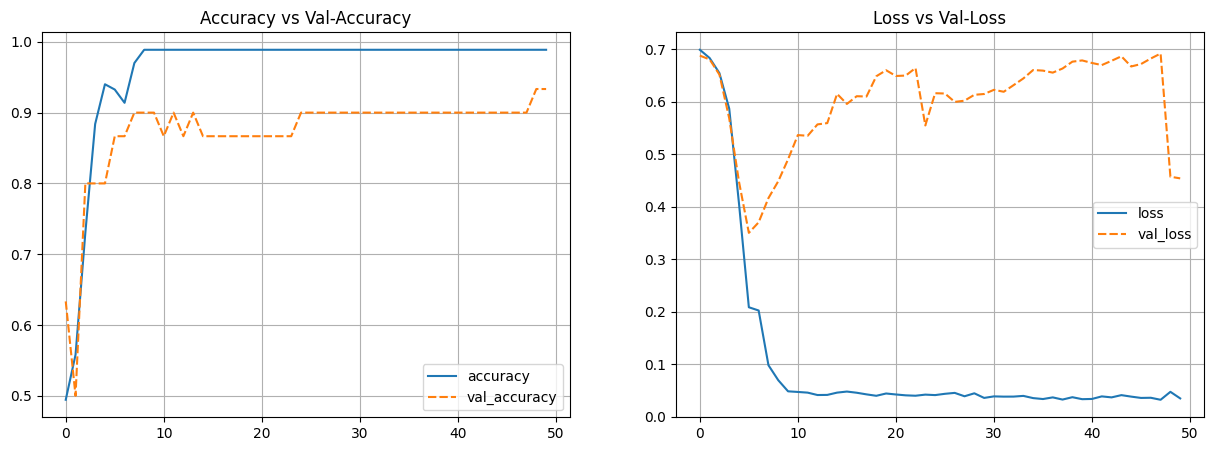

In [154]:
# Plot Training Results

model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Terlihat model kita goodfit. Akurasi kereta lebih tinggi sedikit dari akurasi validasi, akantetapi perbedaan ini tidak terlalu signifikan

## ANN Improvment

### Model Definition

In [155]:
# Download the Embedding Layer

url = 'https://tfhub.dev/google/tf2-preview/nnlm-id-dim128-with-normalization/1'

hub_layer = tf_hub.KerasLayer(url, output_shape=[128], input_shape=[], dtype=tf.string)

In [156]:
# Model Training using LSTM with Transfer Learning

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_2 = Sequential()
model_lstm_2.add(hub_layer)
model_lstm_2.add(Reshape((128, 1)))
model_lstm_2.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.1))
model_lstm_2.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.1))
model_lstm_2.add(Dense(2, activation='softmax'))

model_lstm_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Training

In [157]:
model_lstm_2_hist = model_lstm_2.fit(X_train, y_train_ohe, epochs=50, validation_data=(X_val, y_val_ohe))

Epoch 1/50
9/9 [==============================] - 11s 357ms/step - loss: 0.6937 - accuracy: 0.5056 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 2/50
9/9 [==============================] - 1s 142ms/step - loss: 0.6907 - accuracy: 0.5805 - val_loss: 0.6890 - val_accuracy: 0.6000
Epoch 3/50
9/9 [==============================] - 1s 157ms/step - loss: 0.6873 - accuracy: 0.6105 - val_loss: 0.6862 - val_accuracy: 0.6000
Epoch 4/50
9/9 [==============================] - 2s 241ms/step - loss: 0.6867 - accuracy: 0.5993 - val_loss: 0.6814 - val_accuracy: 0.5667
Epoch 5/50
9/9 [==============================] - 1s 138ms/step - loss: 0.6812 - accuracy: 0.6330 - val_loss: 0.6756 - val_accuracy: 0.6333
Epoch 6/50
9/9 [==============================] - 1s 126ms/step - loss: 0.6765 - accuracy: 0.5955 - val_loss: 0.6676 - val_accuracy: 0.6333
Epoch 7/50
9/9 [==============================] - 1s 126ms/step - loss: 0.6719 - accuracy: 0.6105 - val_loss: 0.6636 - val_accuracy: 0.6667
Epoch 8/50
9/9 [===

### Model Evaluation

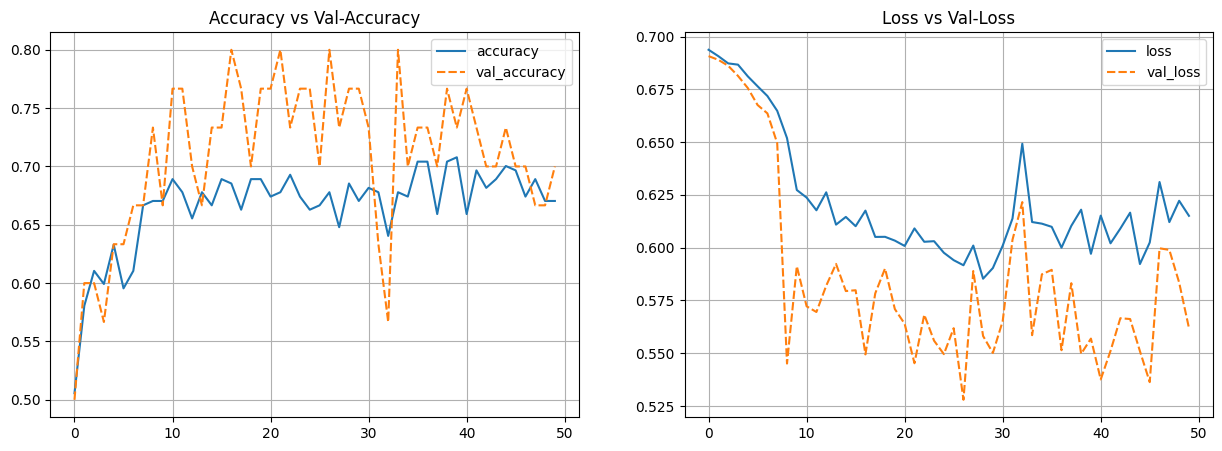

In [158]:
# Plot Training Results

model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Setelah kami menambahkan pembelajaran transfer ke dalam model kami, model tersebut menjadi kurang cocok dan cenderung cocok. Namun, sangat sulit untuk meningkatkan akurasinya, sehingga akurasi yang ditemukan setelah melakukan pembelajaran transfer yaitu sekitar 65%. Berikut beberapa kemungkinan penyebabnya:

1. Pemrosesan awal teks tidak lengkap.
     Kumpulan data dari media sosial sering kali berbentuk teks informal. Oleh karena itu, kita harus menanganinya terlebih dahulu seperti:
     * Menerapkan Formalisasi Kata: `u` menjadi `you`.
     * Hapus karakter khusus dalam sebuah kata : `you[tube]` menjadi `youtube`.
     * dll.

2. Kumpulan data yang seimbang
   
     Dataset kami berisi target dengan distribusi :
     * `0` : 175
     * `1` : 175


## Model Saving

In [159]:
# Model Saving
model_lstm_1.save('best_model.keras')

## Model Inference

In [ ]:
teks = "Dont Forget Subscribe My youtube Channel"
data_inf = text_preprocessing(teks)
data_inf_vec = Vectorize.transform(pd.Series(data_inf)).toarray()
prediction = model_lstm_1.predict(data_inf_vec)
print(prediction)
prediction.argmax(axis=1)

In [ ]:
teks = "Thats Great"
data_inf = text_preprocessing(teks)
data_inf_vec = Vectorize.transform(pd.Series(data_inf)).toarray()
prediction = model_lstm_1.predict(data_inf_vec)
print(prediction)
prediction.argmax(axis=1)

In [ ]:
prediction = model_lstm_1.predict(X_test_vec.toarray())
print(prediction)

## Conclusion

- Berdasarkan evaluasi kedua model, terlihat bahwa model yang ditingkatkan memiliki kinerja lebih buruk daripada model dasar dalam hal akurasi, stabilitas, dan konvergensi.
- Sebaliknya, model dasar menunjukkan performa yang lebih realistis. Oleh karena itu, model dasar adalah pilihan yang lebih disukai dan dipilih pada kasus ini
- Model kedua tidak dapat diandalkan untuk memprediksi sentimen utama dari proyek ini. pengoptimalan dan eksplorasi lebih lanjut terhadap arsitektur yang berbeda mungkin diperlukan untuk mencapai hasil yang lebih baik dan memahami faktor-faktor yang berkontribusi terhadap kurangnya peningkatan model.
- Diketahui penurunan akurasi pada model improvement dari sekitar 90% menjadi 65%